In [201]:
import duckdb
import webcolors
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import seaborn as sns

In [202]:
con = duckdb.connect()

parq = "data.parquet"

In [203]:
def hex_to_name(hex):
    try:
        return webcolors.hex_to_name(hex)
    except:
        cls = {}
        for name in webcolors.names("css3"):
            cls[name] = webcolors.name_to_rgb(name)
        
        target = webcolors.hex_to_rgb(hex)
        min_distance = float("inf")
        closest = None
        
        for name in cls:
            distance = 0
            for i in range(3):
                distance += (cls[name][i] - target[i]) ** 2
            
            if distance < min_distance:
                min_distance = distance
                closest = name
        return closest

def top3(p):
    query = f"""
        SELECT x, y, COUNT(*) AS pixel_count
        FROM parquet_scan('{p}')
        GROUP BY x, y
        ORDER BY pixel_count DESC
        LIMIT 3
    """
    return con.execute(query).fetchall()

top3 = top3(parq)

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [204]:
top3

[(0, 0, 98807), (359, 564, 69198), (349, 564, 55230)]

In [206]:
def topColors(p, top_pixels):
    for i, (x, y, count) in enumerate(top_pixels):
        print(f"\nPixel {i+1}: ({x}, {y}) - {count} placements")

        query_color_distribution = f"""
            SELECT pixel_color, COUNT(*) AS color_count
            FROM parquet_scan('{p}')
            WHERE x = {x} AND y = {y}
            GROUP BY pixel_color
            ORDER BY color_count DESC
        """
        color_distribution = con.execute(query_color_distribution).fetchall()
        for rank, (hex_color, color_count) in enumerate(color_distribution):
            print(f"{rank+1}. {hex_to_name(hex_color)}: {color_count} placements")

    return None

In [207]:
topColors(parq, top3)


Pixel 1: (0, 0) - 98807 placements


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

1. white: 59282 placements
2. black: 8715 placements
3. orangered: 4209 placements
4. darkmagenta: 2200 placements
5. crimson: 2189 placements
6. turquoise: 2105 placements
7. lightgray: 2104 placements
8. yellowgreen: 1910 placements
9. lightpink: 1692 placements
10. darkslateblue: 1567 placements
11. deeppink: 1427 placements
12. gold: 1172 placements
13. darkcyan: 1093 placements
14. dodgerblue: 977 placements
15. slateblue: 974 placements
16. mediumorchid: 899 placements
17. maroon: 817 placements
18. orange: 780 placements
19. springgreen: 672 placements
20. mediumvioletred: 541 placements
21. mediumslateblue: 510 placements
22. sienna: 480 placements
23. lightslategray: 420 placements
24. teal: 364 placements
25. plum: 310 placements
26. lightsalmon: 302 placements
27. moccasin: 233 placements
28. lightskyblue: 213 placements
29. saddlebrown: 210 placements
30. darkcyan: 181 placements
31. darkturquoise: 154 placements
32. darkslategray: 105 placements

Pixel 2: (359, 564) - 6919

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

1. black: 34726 placements
2. turquoise: 26940 placements
3. orangered: 1656 placements
4. white: 1391 placements
5. dodgerblue: 860 placements
6. crimson: 680 placements
7. gold: 357 placements
8. darkturquoise: 343 placements
9. darkslateblue: 288 placements
10. yellowgreen: 236 placements
11. darkmagenta: 201 placements
12. deeppink: 190 placements
13. lightpink: 179 placements
14. slateblue: 139 placements
15. orange: 127 placements
16. lightgray: 119 placements
17. mediumorchid: 110 placements
18. darkcyan: 84 placements
19. mediumslateblue: 77 placements
20. lightslategray: 70 placements
21. mediumvioletred: 60 placements
22. springgreen: 53 placements
23. sienna: 50 placements
24. maroon: 48 placements
25. darkcyan: 46 placements
26. darkslategray: 43 placements
27. lightskyblue: 38 placements
28. plum: 34 placements
29. teal: 20 placements
30. moccasin: 14 placements
31. lightsalmon: 10 placements
32. saddlebrown: 9 placements

Pixel 3: (349, 564) - 55230 placements


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

1. black: 27804 placements
2. turquoise: 19404 placements
3. orangered: 2120 placements
4. white: 1512 placements
5. crimson: 846 placements
6. dodgerblue: 461 placements
7. gold: 398 placements
8. yellowgreen: 310 placements
9. darkturquoise: 267 placements
10. lightpink: 246 placements
11. darkmagenta: 238 placements
12. deeppink: 217 placements
13. orange: 207 placements
14. darkslateblue: 188 placements
15. slateblue: 139 placements
16. mediumorchid: 130 placements
17. lightgray: 114 placements
18. darkcyan: 106 placements
19. mediumvioletred: 66 placements
20. mediumslateblue: 60 placements
21. lightslategray: 53 placements
22. maroon: 50 placements
23. darkslategray: 47 placements
24. springgreen: 45 placements
25. sienna: 44 placements
26. darkcyan: 44 placements
27. plum: 36 placements
28. lightskyblue: 28 placements
29. teal: 18 placements
30. lightsalmon: 11 placements
31. moccasin: 11 placements
32. saddlebrown: 10 placements


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

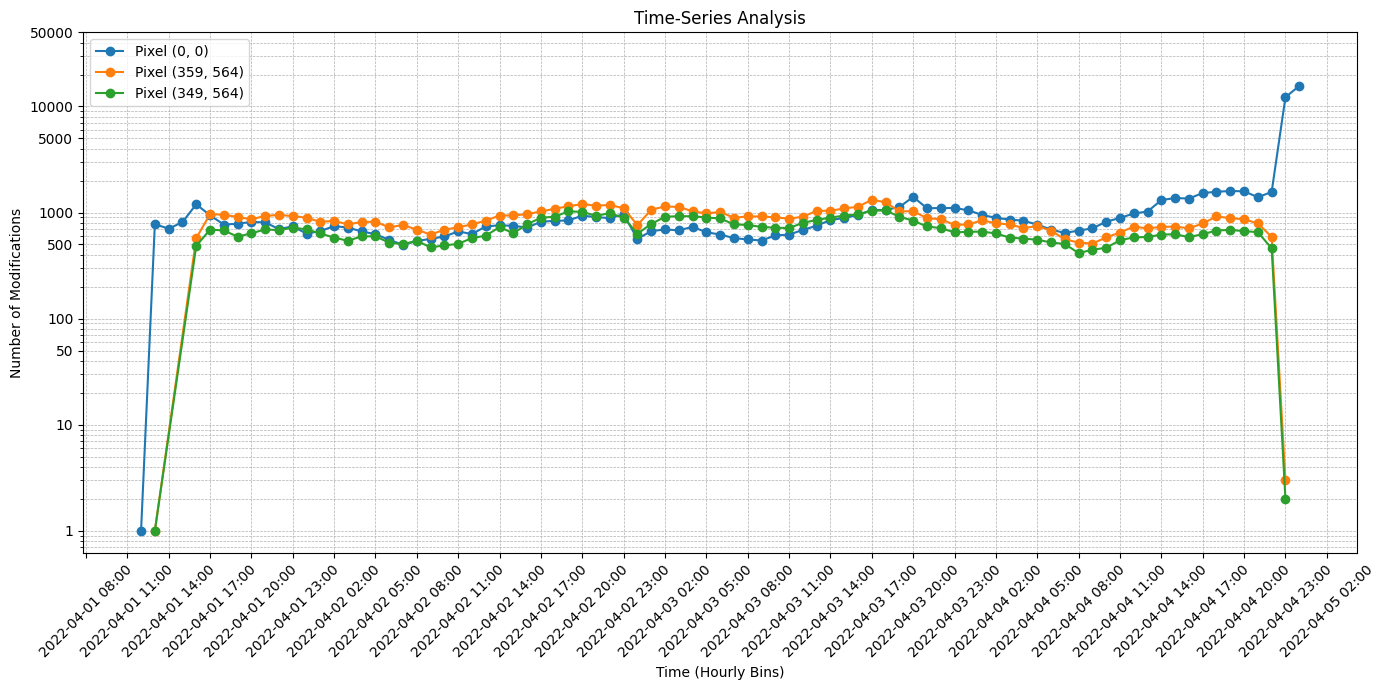

In [208]:
def pixelActivity(p, top_pixels):
    time_series_data = []
    
    for x, y, _ in top_pixels:
        query_time_series = f"""
            SELECT strftime(timestamp, '%Y-%m-%d %H:00') AS hour, COUNT(*) AS modifications
            FROM parquet_scan('{p}')
            WHERE x = {x} AND y = {y}
            GROUP BY hour
            ORDER BY hour
        """
        df = con.execute(query_time_series).fetchdf()
        df['hour'] = pd.to_datetime(df['hour'])
        time_series_data.append((df, x, y))
    
    return time_series_data

def plotPixelActivity(time_series_data):
    plt.figure(figsize=(14, 7))
    for df, x, y in time_series_data:
        plt.plot(df['hour'], df['modifications'], marker="o", linestyle="-", label=f"Pixel ({x}, {y})")
    plt.yscale("log") 
    yticks = [1, 10, 50, 100, 500, 1000, 5000, 10000, 50000]
    plt.yticks(yticks, [str(y) for y in yticks]) 

    plt.xlabel("Time (Hourly Bins)")
    plt.ylabel("Number of Modifications")
    plt.title("Time-Series Analysis")
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=3))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()



plotPixelActivity(pixelActivity(parq, top3))

In [209]:
def grid(p):
    query = f"""
        SELECT MAX(x) AS max_x, MAX(y) AS max_y
        FROM parquet_scan('{p}')
    """
    max_x, max_y = con.execute(query).fetchone()
    return max_x + 1, max_y + 1

In [210]:
grid(parq)

(2000, 2000)

In [211]:
def perimeterheat(p, top_pixels):
    heatmap= []
    for x, y, _ in top_pixels:
        query_perimeter = f"""
            SELECT x, y, COUNT(*) as modifications
            FROM parquet_scan('{p}')
            WHERE x BETWEEN {x-25} AND {x+25} AND y BETWEEN {y-25} AND {y+25}
            GROUP BY x, y
        """
        df = con.execute(query_perimeter).fetchdf()
        heatmap.append((df, x, y))
    
    return heatmap

def plotPerimeterheat(heatmap):
    for df, center_x, center_y in heatmap:
        pivot_df = df.pivot(index='y', columns='x', values='modifications').fillna(0)
        plt.figure(figsize=(12, 12)) 
        sns.heatmap(pivot_df, linewidths=0.2, robust=True)
        plt.title(f"Heatmap of Modifications ({center_x}, {center_y})")
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.show()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

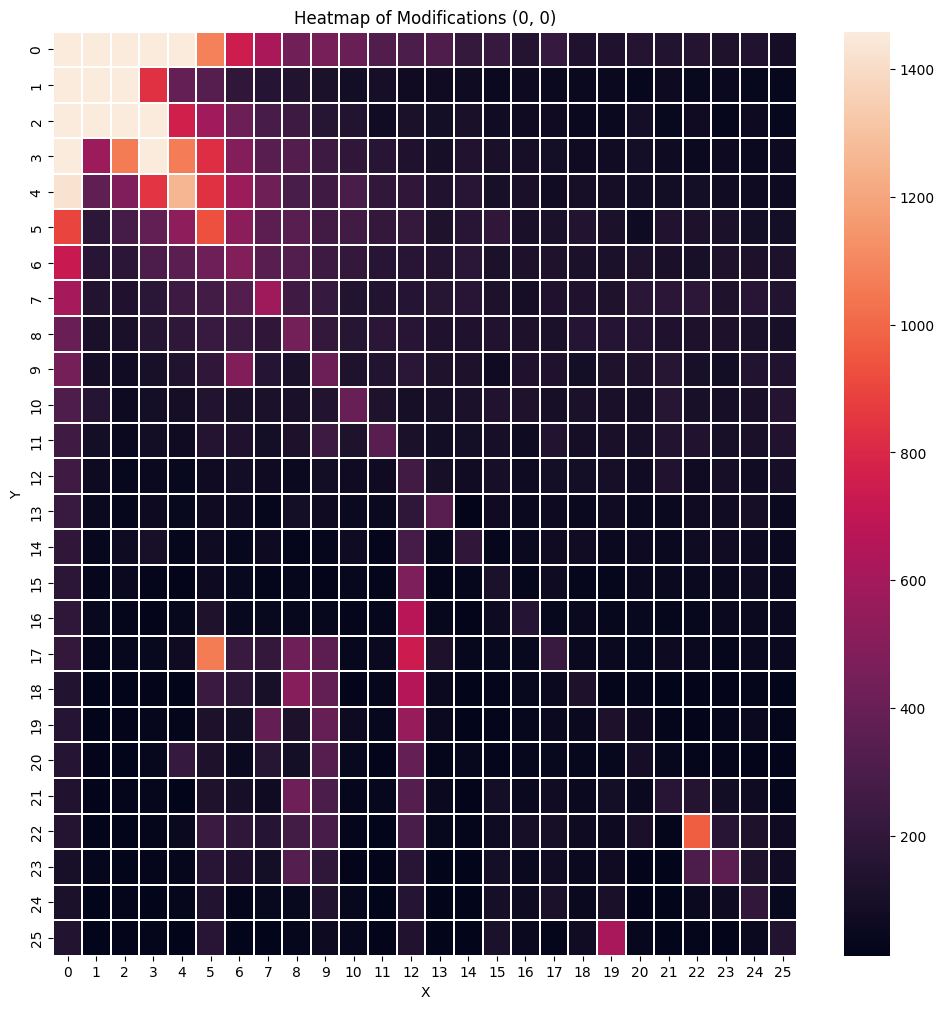

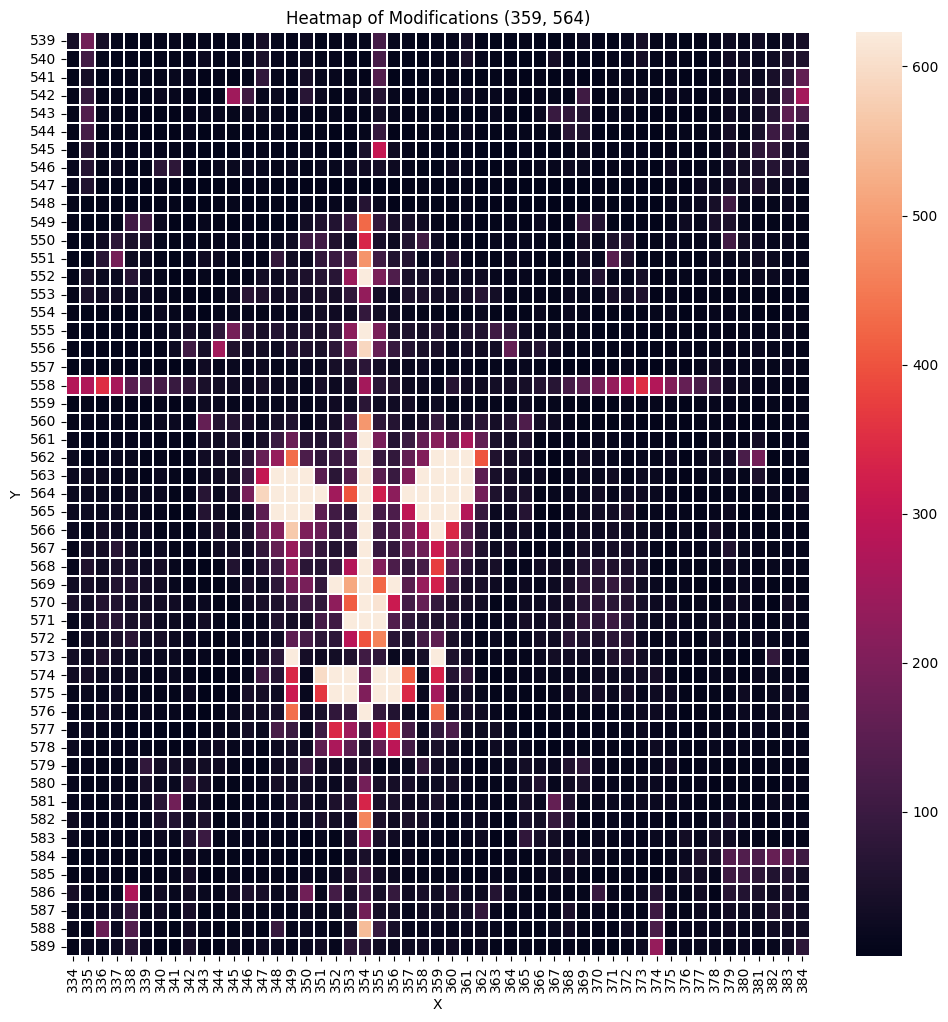

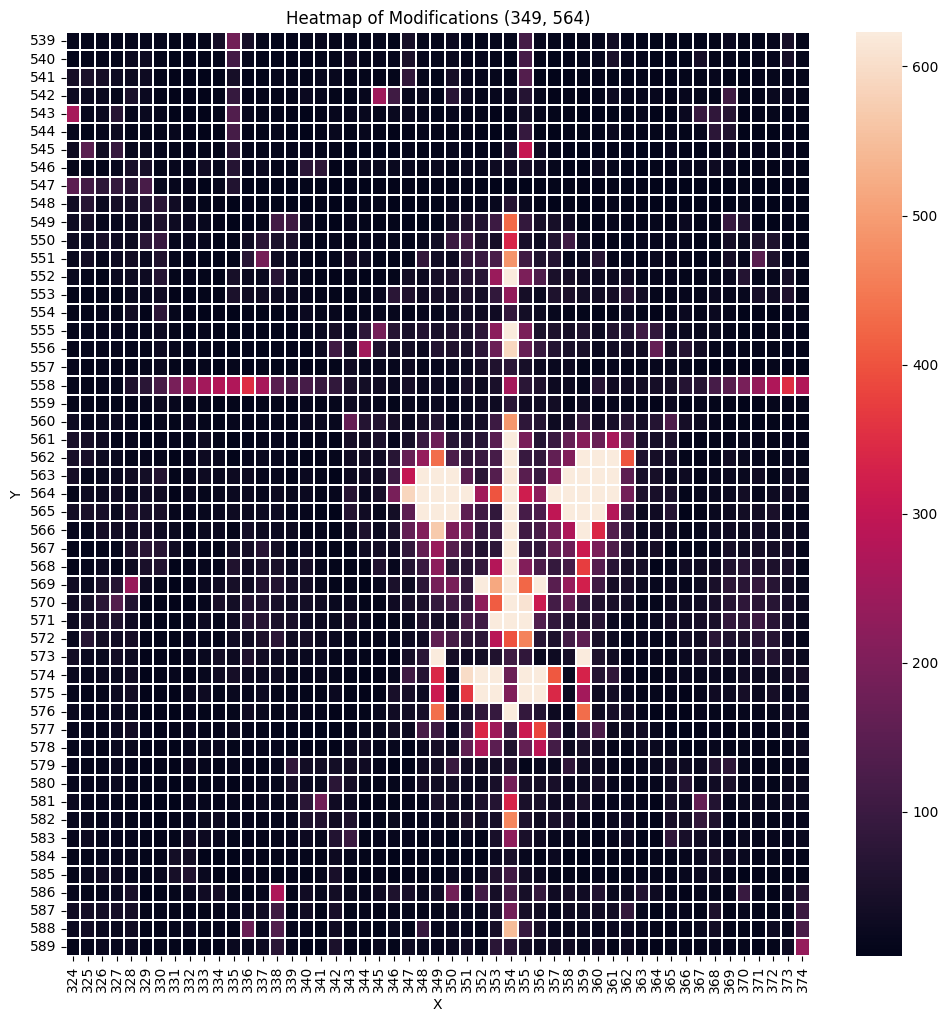

In [212]:
heatmap = perimeterheat(parq, top3)
plotPerimeterheat(heatmap)

In [213]:
def uniqueUsers(p, top_pixels):
    stats = []
    for x, y, _ in top_pixels:
        q = f"""
            SELECT COUNT(*) AS total_modifications, COUNT(DISTINCT user_id) AS unique_users
            FROM parquet_scan('{p}')
            WHERE x = {x} AND y = {y}
        """
        total_modifications, unique_users = con.execute(q).fetchone()
        stats.append((x, y, total_modifications, unique_users))
    
    return stats

user_stats = uniqueUsers(parq, top3)


for x, y, totMod, uniq in user_stats:
    print(f"Pixel ({x}, {y}): {totMod} total modifications, {uniq} unique users")


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

Pixel (0, 0): 98807 total modifications, 83906 unique users
Pixel (359, 564): 69198 total modifications, 48906 unique users
Pixel (349, 564): 55230 total modifications, 42147 unique users


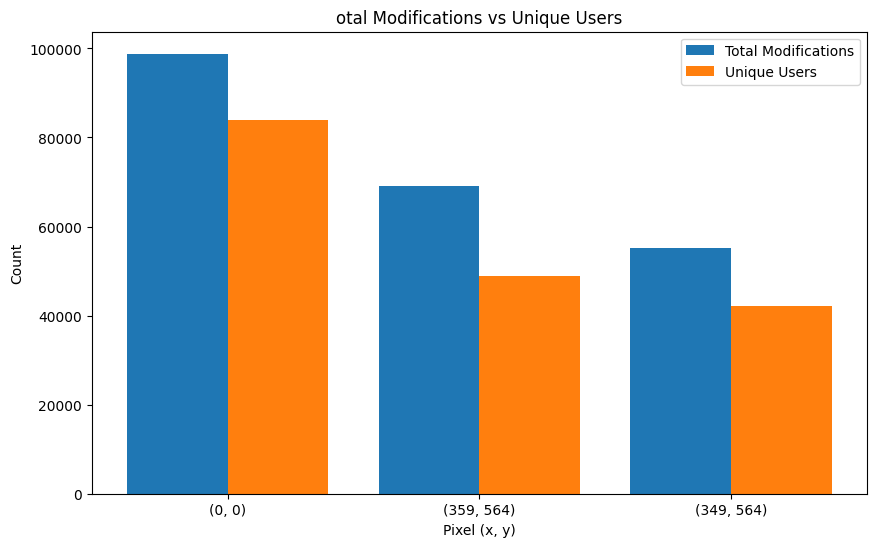

In [180]:
def plotUniqueUsers(stats):
    pixels = [f"({x}, {y})" for x, y, _, _ in stats]
    total_mods = [total for _, _, total, _ in stats]
    unique_users = [unique for _, _, _, unique in stats]

    x = np.arange(len(pixels))
    plt.figure(figsize=(10, 6))
    plt.bar(x - 0.2, total_mods, width=0.4, label='Total Modifications')
    plt.bar(x + 0.2, unique_users, width=0.4, label='Unique Users')

    plt.xlabel("Pixel (x, y)")
    plt.ylabel("Count")
    plt.title("otal Modifications vs Unique Users")
    plt.xticks(x, pixels)
    plt.legend()
    plt.show()

plotUniqueUsers(user_stats)


In [181]:
def repeatUsers(p, top_pixels):
    repeat_stats = []
    
    for x, y, _ in top_pixels:
        query_repeat_users = f"""
            SELECT 
                COUNT(DISTINCT user_id) AS total_users,
                COUNT(DISTINCT CASE WHEN user_count > 2 THEN user_id END) AS more_2
            FROM (
                SELECT user_id, COUNT(*) AS user_count
                FROM parquet_scan('{p}')
                WHERE x = {x} AND y = {y}
                GROUP BY user_id
            ) AS user_mods
        """
        total_users, more_2 = con.execute(query_repeat_users).fetchone()
        perc = (more_2 / total_users) * 100 if total_users > 0 else 0
        repeat_stats.append((x, y, total_users, more_2, perc))
    
    return repeat_stats

repeat_stats = repeatUsers(parq, top3)

for x, y, total_users, more_2, perc in repeat_stats:
    print(f"Pixel ({x}, {y}): {total_users} total users, {more_2} users placed more than 2 times ({perc:.2f}%)")


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

Pixel (0, 0): 83906 total users, 2407 users placed more than 2 times (2.87%)
Pixel (359, 564): 48906 total users, 3843 users placed more than 2 times (7.86%)
Pixel (349, 564): 42147 total users, 2489 users placed more than 2 times (5.91%)


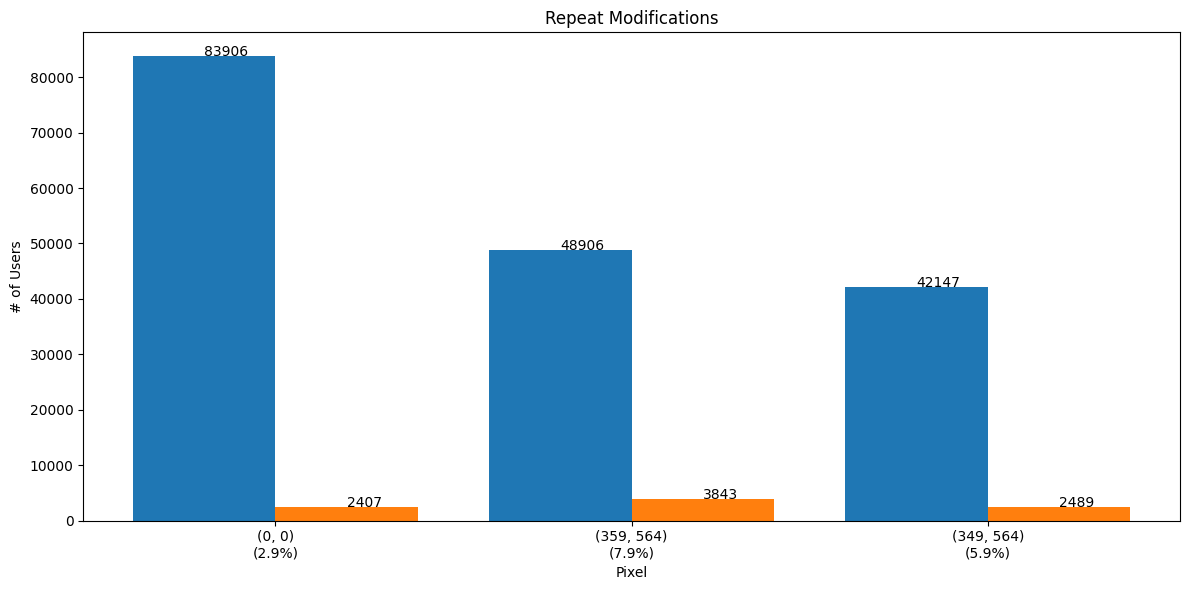

In [188]:
def plotRepeatUsers(repeat_stats):
    pixels = [f"({x}, {y})" for x, y, _, _, _ in repeat_stats]
    total_users = [total for _, _, total, _, _ in repeat_stats]
    more_2 = [repeat for _, _, _, repeat, _ in repeat_stats]
    percentage = [pct for _, _, _, _, pct in repeat_stats]

    x = np.arange(len(pixels)) 
    fig, ax1 = plt.subplots(figsize=(12, 6))
    bars1 = ax1.bar(x - 0.2, total_users, width=0.4)
    bars2 = ax1.bar(x + 0.2, more_2, width=0.4)

    ax1.set_ylabel("# of Users")
    ax1.set_xlabel("Pixel")
    ax1.set_title("Repeat Modifications")
    ax1.set_xticks(x)
    
    labs = [f"{pixel}\n({pct:.1f}%)" for pixel, pct in zip(pixels, percentage)]
    ax1.set_xticklabels(labs)

    for bar in bars1:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}')

    for bar in bars2:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}')

    fig.tight_layout()
    plt.show()

    
plotRepeatUsers(repeat_stats)


In [185]:
def sharedUsers(p, coord1, coord2):
    x1, y1 = coord1
    x2, y2 = coord2
    
    query_shared_users = f"""
        SELECT COUNT(*) AS shared_users
        FROM (
            SELECT DISTINCT user_id FROM parquet_scan('{p}') WHERE x = {x1} AND y = {y1}
            INTERSECT
            SELECT DISTINCT user_id FROM parquet_scan('{p}') WHERE x = {x2} AND y = {y2}
        ) AS common_users
    """
    
    sharedCount = con.execute(query_shared_users).fetchone()[0]
    return sharedCount

sharedCount = sharedUsers(parq, (359, 564), (349, 564))
print(f"On both (359, 564) and (349, 564): {sharedCount}")


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

On both (359, 564) and (349, 564): 10579


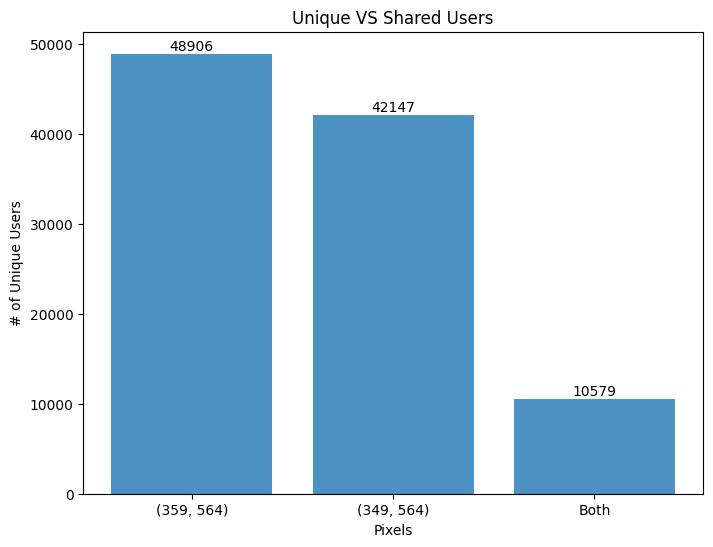

In [187]:
def overlapUsers(unique_1, unique_2, shared, coord1, coord2):
    labels = [f"{coord1}", f"{coord2}", "Both"]
    values = [unique_1, unique_2, shared]
    _, ax = plt.subplots(figsize=(8, 6))
    bars = ax.bar(labels, values, alpha=0.8)
    
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}', 
                ha='center', va='bottom')

    ax.set_ylabel("# of Unique Users")
    ax.set_xlabel("Pixels")
    ax.set_title("Unique VS Shared Users")
    plt.show()


overlapUsers(48906 , 42147 , sharedCount, (359, 564), (349, 564))